In [5]:
!pip install minisom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

doc_data = pd.read_csv('./movie_data_70.csv')
movie_titles = doc_data['Title'].tolist()  # convert column Title of panda frame to list
movie_genre = doc_data['Genre'].tolist()
movie_synopses = doc_data['Synopsis'].tolist()
doc_data

,Genre,Title,Synopsis
0,"Adventure, Biography, Drama",Lawrence of Arabia,"In 1935, T. E. Lawrence (Peter O'Toole) is kil..."
1,"Adventure, Biography, Drama",Mutiny on the Bounty,"In 1787, British ship Bounty leaves Portsmouth..."
2,"Adventure, Drama, Fantasy",The Lord of the Rings: The Return of the King,"In the opening scene, a flashback, two hobbits..."
3,"Adventure, Drama, History",Ben-Hur,Judah Ben-Hur (Charlton Heston) is a wealthy m...
4,"Adventure, Drama, Romance",The African Queen,"An English spinster, Rose (Katharine Hepburn),..."
5,"Adventure, Drama, Thriller",Jaws,"Late one night, on one of the many beaches of ..."
6,"Adventure, Drama, War",The Bridge on the River Kwai,[this synopsis is primarily from the wikipedia...
7,"Adventure, Drama, Western",The Treasure of the Sierra Madre,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
8,"Adventure, Drama, Western",Dances with Wolves,"During a US Civil War battle, Union Army Offic..."
9,"Adventure, Drama, Western",Stagecoach,A group of people traveling on a stagecoach fi...


In [7]:
# Lemmatization using spacy package
import spacy
def spacy_Lemmatizer(text):
  # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
    nlp = spacy.load('en', disable=['parser', 'ner'])
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(text)
    # Extract the lemma for each token and join
    text_lem= " ".join([token.lemma_ for token in doc])
    return text_lem

import nltk
nltk.download('punkt')
nltk.download('stopwords')
def normalize(text):
    tokens = nltk.word_tokenize(text)
    from nltk.corpus import stopwords
    stopwords_en = stopwords.words('english')
    # add more user stopwords
    stopwords_user  = ['mr', 'mrs', 'come', 'go', 'get',
                     'tell', 'listen', 'one', 'two', 'three',
                      'four', 'five', 'six', 'seven', 'eight',
                      'nine', 'zero', 'join', 'find', 'make',
                      'say', 'ask', 'tell', 'see', 'try', 'back',
                      'also','york','michael','never','soon','john','would','could','attempt',
                        'reach', ]

    stopwords = set(stopwords_en + stopwords_user)


    filtered_tokens = [w.lower() for w in tokens if w.lower() not in stopwords and w.isalnum()] # remove stopwords and punctuation from tokens
    text = " ".join(filtered_tokens)
    return (text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#this take around 45 seconds
# lemmatizer and normalize for every movies synopses
from tqdm import tqdm 
norm_movie_synopses=[]
for i in tqdm(range(len(movie_synopses))):
    synopses_lem = spacy_Lemmatizer(movie_synopses[i])
    norm_movie_synopses+= [normalize(synopses_lem)]

100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:50<00:00,  1.39it/s]


In [11]:
max_features= 300
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.15, max_df=0.6, max_features= max_features)
feature_matrix = vectorizer.fit_transform(norm_movie_synopses).astype(float)
feature_names = vectorizer.get_feature_names() # get feature names
print("number of feature:", len(feature_names))

number of feature: 300


In [12]:
#display feature matrix
pd.DataFrame(feature_matrix.toarray(), columns=feature_names)

In [15]:
#Step 1 tranining the Neural network 
# som_2 with 2x3 output - take about 1-2 minutes
D = feature_matrix.todense().tolist()
from minisom import MiniSom
som_6 = MiniSom(x=2, y= 3, input_len= max_features, random_seed=100)
import time
start = time.time()

#start training
som_6.pca_weights_init(D)
som_6.train_batch(data=D, num_iteration= max_features*2000)
#end tranining
end = time.time()
print(end - start,'seconds')

47.62080144882202 seconds


In [16]:
#Movies name, key feature and genre of every cluster
top_keywords =10
xmap_dim=2
ymap_dim=3
weights = som_6.get_weights()
for i in range(xmap_dim):
    
    for j in range(ymap_dim):
        keywords_idx = np.argsort(weights[i,j,:])[-top_keywords:]
        keywords = ' '.join([feature_names[k] for k in keywords_idx])
        print('\n')
        print('Cell', i,'-',j, '-','keyword:', keywords)
        movies_t =[]
        movies_g =[]
        for k, (t, g, vec) in enumerate(zip(movie_titles, movie_genre, D)):
            winnin_position = som_6.winner(vec)
            if winnin_position[0]==i and winnin_position[1]==j: 
                movies_t+=[t]
                movies_g+=[g]
        print('Titles:', movies_t)
        print('Genre:', movies_g)



Cell 0 - 0 - keyword: ship love soldier kill father george war officer water captain
Titles: ['Mutiny on the Bounty', 'The African Queen', 'Jaws', 'The Sound of Music', "One Flew Over the Cuckoo's Nest", '12 Angry Men', 'Titanic']
Genre: ['Adventure, Biography, Drama', 'Adventure, Drama, Romance', 'Adventure, Drama, Thriller', 'Biography, Drama, Family', 'Drama', 'Drama', 'Drama, Romance']


Cell 0 - 1 - keyword: marry year act son film war brother family george father
Titles: ['Stagecoach', 'Amadeus', 'Braveheart', "The King's Speech", 'Yankee Doodle Dandy', 'The Philadelphia Story', 'It Happened One Night', 'The Godfather', 'Forrest Gump', 'A Place in the Sun', 'Doctor Zhivago']
Genre: ['Adventure, Drama, Western', 'Biography, Drama, History', 'Biography, Drama, History', 'Biography, Drama, History ', 'Biography, Drama, Musical', 'Comedy, Romance', 'Comedy, Romance', 'Crime, Drama', 'Drama, Romance', 'Drama, Romance', 'Drama, Romance, War']


Cell 0 - 2 - keyword: mother husband fa

In [17]:
D = feature_matrix.todense().tolist()
from minisom import MiniSom
som_100 = MiniSom(10, 10, max_features, random_seed=100)

import time
start = time.time()

#start training
som_100.pca_weights_init(D)
som_100.train_batch(D, num_iteration=max_features*2000)
#end tranining
end = time.time()
print(end - start,'seconds')

127.95196962356567 seconds


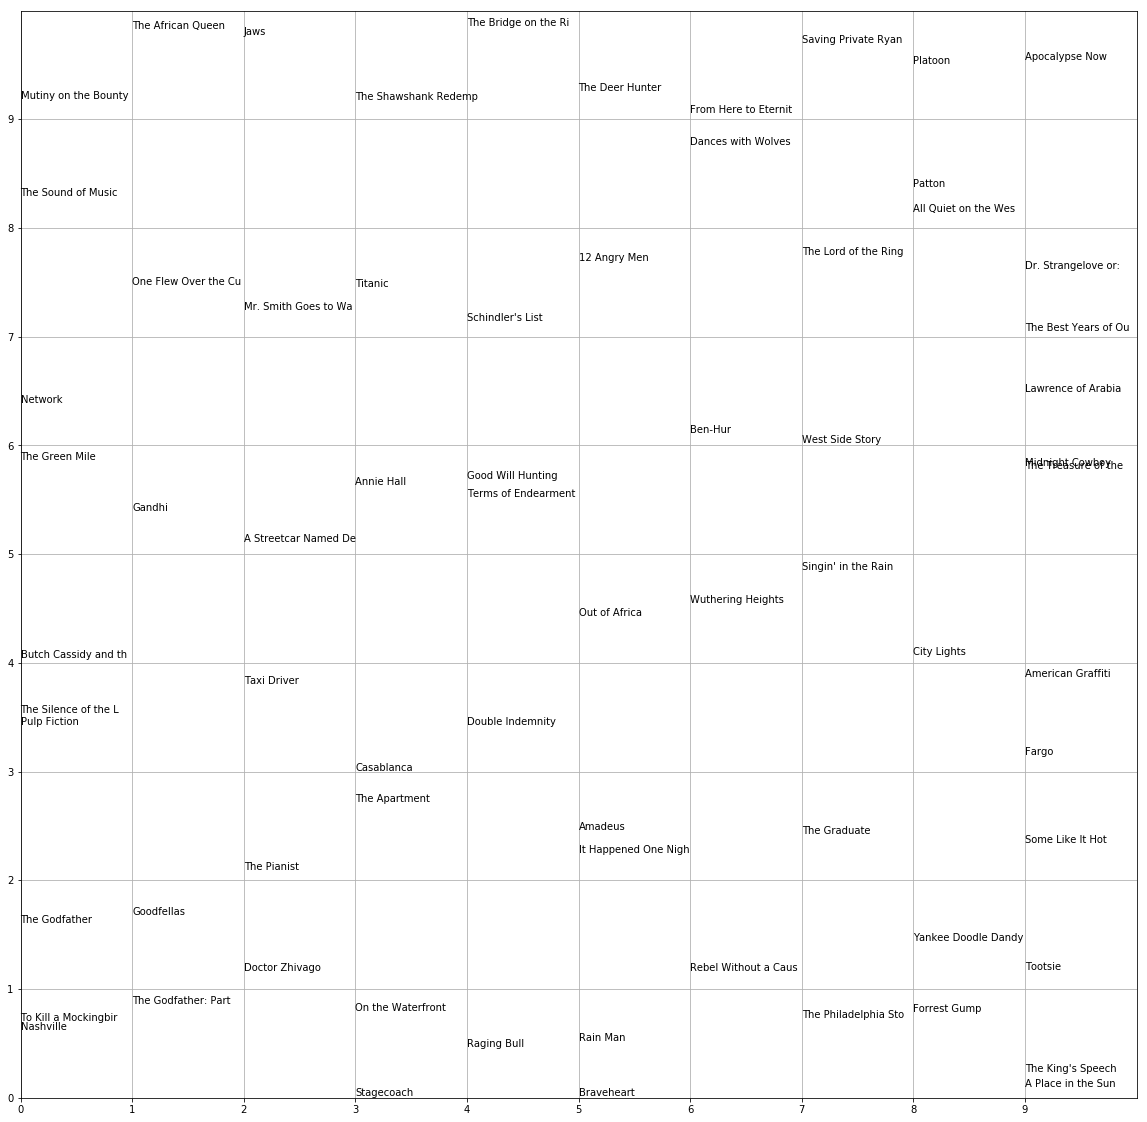

In [18]:
# show cluster in movies titles
titles=movie_titles
xmap_dim=10
ymap_dim=10

plt.figure(figsize=(20, 20))
for i, (t, vec) in enumerate(zip(titles, D)):
    winnin_position = som_100.winner(vec)
    plt.text(winnin_position[0], 
             winnin_position[1]+np.random.rand()*0.9, 
             t[0:20], color='black')
    
plt.xticks(range(xmap_dim))
plt.yticks(range(ymap_dim))
plt.grid()
plt.xlim([0, xmap_dim])
plt.ylim([0, ymap_dim])
plt.plot()
plt.savefig('./som_100_titles.png', dpi=300)